<a href="https://colab.research.google.com/github/notsogeekynair/datascwpython/blob/main/data_science_with_python_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Varun Nair
Class: CS 677
Date: 10/26/2024
Homework Problem #1
Description : importing dataset
"""
import pandas as pd
import io
import requests

#q1
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
response = requests.get(url)
response.raise_for_status()


data = pd.read_csv(io.StringIO(response.text))

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
"""
Varun Nair
Class: CS 677
Date: 10/26/2024
Homework Problem #1
Description : dividing dataset into two parts
"""
#q1
features =['creatinine_phosphokinase','serum_creatinine','serum_sodium','platelets','DEATH_EVENT']
data=data[features]
df_0=data[data['DEATH_EVENT']==0]
df_1=data[data['DEATH_EVENT']==1]

In [3]:
df_1.head()

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets,DEATH_EVENT
0,582,1.9,130,265000.00,1
1,7861,1.1,136,263358.03,1
2,146,1.3,129,162000.00,1
3,111,1.9,137,210000.00,1
4,160,2.7,116,327000.00,1


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
"""
Varun Nair
Class: CS 677
Date: 10/26/2024
Homework Problem #1
Description : forming correlations plots
"""
#q2
m0=df_0.corr()
m1=df_1.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(m0, annot=True, cmap="Greens", cbar=True, square=True)
plt.title("Correlation Matrix for Surviving Patients")
plt.savefig("cm0.png")
plt.close()

plt.figure(figsize=(12, 12))
sns.heatmap(m1, annot=True, cmap="Reds", cbar=True, square=True)
plt.title("Correlation Matrix for Deceased Patients")
plt.savefig("cm1.png")
plt.close()

In [6]:
"""
Varun Nair
Class: CS 677
Date: 10/26/2024
Homework Problem #2
Description : Linear Regression
"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#q1
#choosing group 2 : X: platelets, Y : serum sodium

#for surviving patients
x=df_0['platelets'].values.reshape(-1,1)
y=df_0['serum_sodium']

#dividing dataset 50/50 into train and test using last 3 digits of BU ID as random_state
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.5,random_state=154)

model=LinearRegression()
model.fit(xtrain,ytrain)

#predicting y values
ypred=model.predict(xtest)

r=ytest-ypred
sse=sum(r**2)
print("Sum of squared errors (for surviving patients) : ",sse)

#for dead patients
x1=df_1['platelets'].values.reshape(-1,1)
y1=df_1['serum_sodium']

#dividing dataset 50/50 into train and test using last 3 digits of BU ID as random_state
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.5,random_state=154)

model1=LinearRegression()
model1.fit(xtrain1,ytrain1)

#predicting y values
ypred1=model1.predict(xtest1)

r1=ytest1-ypred1
sse1=sum(r1**2)
print("Sum of squared errors (for deceased patients) : ",sse1)

Sum of squared errors (for surviving patients) :  1706.4679544129751
Sum of squared errors (for deceased patients) :  883.0399047302674


In [7]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
"""
Varun Nair
Class: CS 677
Date: 11/01/2024
Homework Problem #2
Description : Polynomial Regression
"""
#q2
def model1(x,y):
  model=LinearRegression()
  model.fit(x,y)
  y_pred=model.predict(x)
  weights = model.coef_,model.intercept_
  return y_pred,weights

def model2(x,y):
  poly = PolynomialFeatures(degree=2)
  xpoly = poly.fit_transform(x)
  model = LinearRegression()
  model.fit(xpoly, y)
  y_pred = model.predict(xpoly)
  weights = model.coef_,model.intercept_
  return y_pred,weights

def model3(x,y):
  poly=PolynomialFeatures(degree=3)
  xpoly = poly.fit_transform(x)
  model = LinearRegression()
  model.fit(xpoly,y)
  y_pred =model.predict(xpoly)
  weights = model.coef_,model.intercept_
  return y_pred,weights

def model4(x,y):
  xlog = np.log(x).reshape(-1,1)
  model =LinearRegression()
  model.fit(xlog,y)
  y_pred = model.predict(xlog)
  weights = model.coef_,model.intercept_
  return y_pred,weights

def model5(x,y):
  xlog = np.log(x).reshape(-1,1)
  ylog = np.log(y)
  model = LinearRegression()
  model.fit(xlog,ylog)
  y_pred = np.exp(model.predict(xlog))
  weights = model.coef_,model.intercept_
  return y_pred,weights

In [18]:
"""
Varun Nair
Class: CS 677
Date: 11/01/2024
Homework Problem #2
Description : analysis using different models
"""
#q2

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
#choosing group 2
x0=df_0['platelets'].values.reshape(-1,1)
y0=df_0['serum_sodium']
x1=df_1['platelets'].values.reshape(-1,1)
y1=df_1['serum_sodium']

def evaluate_model(x, y, model_func):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=154)

    _, weights = model_func(x_train, y_train)

    print(f"Weights: {weights}")

    y_test_pred, _ = model_func(x_test, y_test)
    print("Predicted Values : ",y_test_pred)
    #plotting
    plt.scatter(x_test, y_test, color="blue", label="Actual")
    plt.scatter(x_test, y_test_pred, color="red", marker='x', label="Predicted")
    plt.title("Actual vs Predicted (Test Set)")
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.legend()
    plt.show()

    residuals = y_test - y_test_pred
    sse = sum(residuals ** 2)
    print("SSE : ",sse)
    print("\n")



Analysis for Model 1

For surviving patients 

Weights: (array([1.4948866e-06]), 136.30829567666058)
Predicted Values :  [137.76454115 137.71515966 137.70645301 137.72690658 137.71515966
 137.65491001 137.786631   137.76617743 137.78008586 137.48637259
 137.73345172 137.74572386 137.73672429 137.67863615 137.67127286
 137.71515966 137.68109058 137.82262929 137.68109058 137.69908972
 137.65736444 137.67781801 137.71515966 137.49455401 137.73836058
 137.80790272 137.83081071 137.63200201 137.59845815 137.80872086
 137.61809358 137.66145515 137.75063272 137.71218001 137.61154844
 137.72445215 137.61236658 137.68927201 137.71515966 137.74408758
 137.803812   137.71515966 137.80872086 137.77844957 137.72199772
 137.73672429 137.79972129 137.76454115 137.68681758 137.68763572
 137.77599515 137.66227329 137.71136186 137.71515966 137.75717786
 137.74981457 137.71218001 137.59845815 137.723634   137.66554586
 137.73754243 137.69336272 137.74572386 137.72199772 137.74163315
 137.77599515 137.779

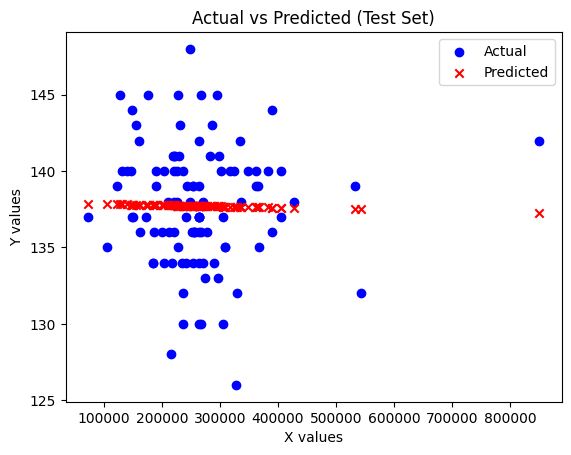

SSE :  1596.082792749195


For deceased patients 

Weights: (array([1.19518567e-05]), 132.15691719783106)
Predicted Values :  [135.86650915 135.69138919 135.19571064 135.32037231 135.37083061
 135.62312208 135.3025635  135.53407803 135.26397775 135.37973501
 135.52814176 135.37676688 135.66170784 135.33818112 134.85437512
 135.35598993 135.39160755 135.43909771 135.20758318 135.27288215
 135.30849977 135.28475469 135.51923736 135.09182592 135.66764411
 136.19003587 135.13041167 135.49655496 135.36489434 135.50142855
 134.9374829  135.34708553 135.20758318 135.08885778 135.4123845
 135.16306116 135.61124954 135.43909771 135.35895807 135.49655496
 135.43612958 135.75668816 135.87244542 136.55808461 135.78340137
 135.86947729 135.49655496 135.63499462]


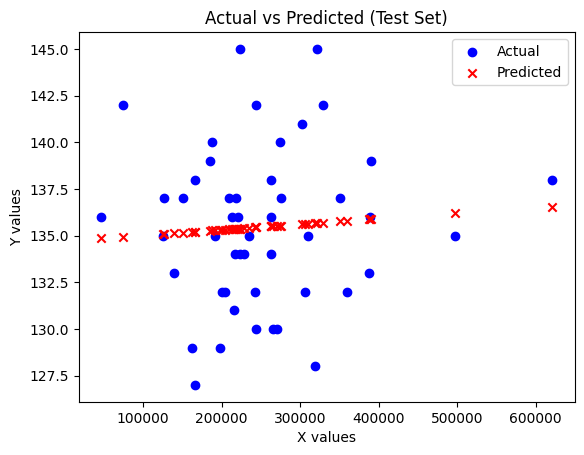

SSE :  839.6796585074719




In [19]:
#For Model 1
print("Analysis for Model 1\n")
print("For surviving patients \n")
evaluate_model(x0, y0, model1)
print("For deceased patients \n")
evaluate_model(x1, y1, model1)


Analysis for Model 2

For surviving patients 

Weights: (array([ 0.00000000e+00, -1.01701617e-05,  1.74006846e-11]), 138.0332919619274)
Predicted Values :  [137.94364233 137.47820214 137.41405524 137.57326009 137.47820214
 137.14432159 138.20777811 137.96202231 138.12591134 137.57634469
 137.63046576 137.74590725 137.66020681 137.24510409 137.2095585
 137.47820214 137.25780627 138.71229972 137.25780627 137.36399754
 137.15289779 137.24096488 137.47820214 137.50889603 137.67536188
 138.49480702 138.83976852 137.08485964 137.06487327 138.50648684
 137.06689788 137.16813995 137.79507163 137.45564481 137.0631878
 137.55259048 137.06348557 137.30322952 137.47820214 137.72989852
 138.43711933 137.47820214 138.50648684 138.1059189  137.53234769
 137.66020681 138.38061727 137.94364233 137.28910458 137.29376547
 138.07628593 137.17133065 137.44956117 137.47820214 137.86327995
 137.786759   137.45564481 137.06487327 137.54579546 137.18456773
 137.66776063 137.32771959 137.74590725 137.53234769 1

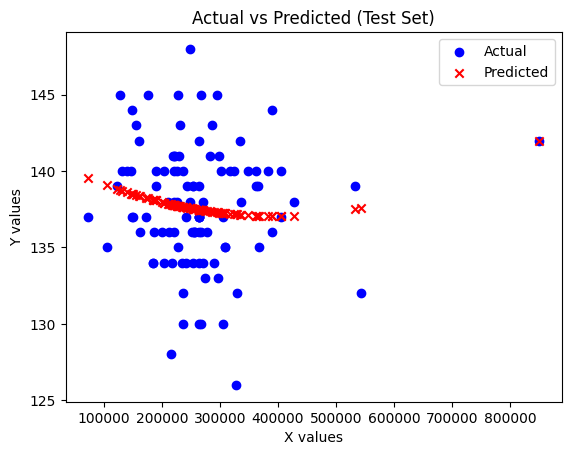

SSE :  1554.3635122483108


For deceased patients 

Weights: (array([ 0.00000000e+00,  6.65768356e-05, -1.03326480e-10]), 125.88045098906105)
Predicted Values :  [135.72288608 135.41846384 135.36358517 135.26516048 135.24676252
 135.3401068  135.27460383 135.27189057 135.30034441 135.24479841
 135.26871092 135.24541036 135.38161662 135.25725623 136.01903366
 135.2508911  135.24277814 135.24153753 135.35096216 135.29376298
 135.27128503 135.28558628 135.26426208 135.50321535 135.38864404
 136.67673934 135.44523904 135.25466792 135.24828569 135.25651875
 135.8073731  135.25388128 135.35096216 135.50797434 135.24088865
 135.40182555 135.32878815 135.24153753 135.24997987 135.25466792
 135.24129442 135.51457676 135.73581341 138.37946602 135.55985972
 135.72932837 135.25466792 135.3521095 ]


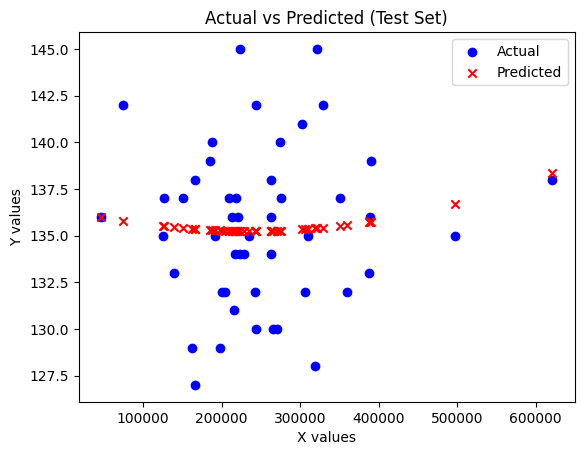

SSE :  832.089940394149




In [21]:
#For Model 2
print("Analysis for Model 2\n")
print("For surviving patients \n")
evaluate_model(x0, y0, model2)
print("For deceased patients \n")
evaluate_model(x1, y1, model2)

Analysis for Model 3

For surviving patients 

Weights: (array([ 0.00000000e+00, -4.49368248e-05,  1.29256059e-10, -1.00383569e-16]), 141.08208899107163)
Predicted Values :  [137.9086267  137.42312778 137.36381341 137.51531902 137.42312778
 137.16192954 138.21237762 137.92923065 138.11656266 137.98173052
 137.57286317 137.69292489 137.60331765 137.22399987 137.19925416
 137.42312778 137.23336744 138.8300604  137.23336744 137.31952437
 137.16600077 137.2210023  137.42312778 137.89950804 137.61896878
 138.5585087  138.99250362 137.1491142  137.20844507 138.57290074
 137.16281046 137.17397478 137.74546436 137.40197377 137.17466356
 137.49488694 137.17299593 137.26868945 137.42312778 137.6759891
 138.48776007 137.42312778 138.57290074 138.09338065 137.47507556
 137.60331765 138.41901991 137.9086267  137.25742696 137.2611174
 138.05918263 137.17574893 137.39632161 137.42312778 137.81959361
 137.73652667 137.40197377 137.20844507 137.48821434 137.18344729
 137.61110779 137.28874034 137.69292

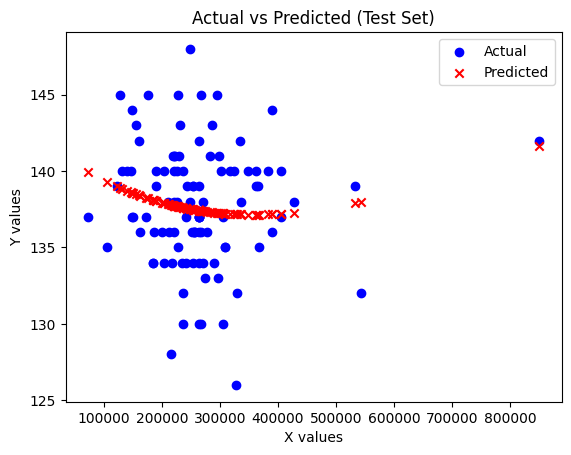

SSE :  1553.3835682021797


For deceased patients 

Weights: (array([ 0.00000000e+00,  1.67632135e-04, -5.38757236e-10,  5.50313918e-16]), 119.4017868004229)
Predicted Values :  [136.47123858 135.76283604 135.1401285  134.95711673 134.96444442
 135.51434207 134.96497297 135.24069924 135.00204144 134.97003984
 135.22502509 134.96803708 135.65152042 134.95482953 137.58569325
 134.95791371 134.97940565 135.03752081 135.10908747 134.99097916
 134.96172324 134.9785959  135.20219599 135.55000007 135.6734171
 137.51516814 135.36765872 135.14789785 134.96140831 135.15908395
 136.67997833 134.95571255 135.10908747 135.56557678 135.00087088
 135.24160046 135.4741263  135.03752081 134.95893608 135.14789785
 135.03296402 136.02063309 136.49547877 136.99832745 136.12946442
 136.48336597 135.14789785 135.55553962]


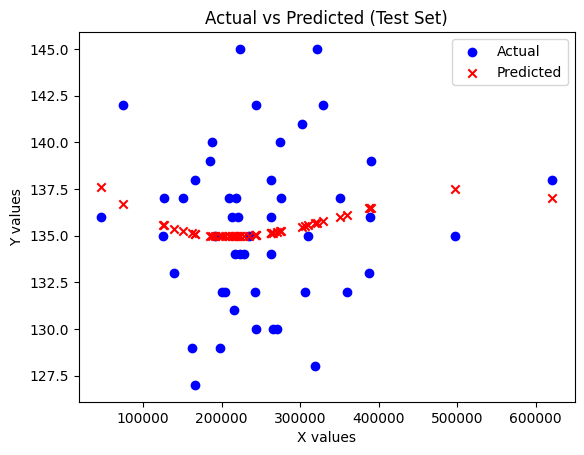

SSE :  821.8801553791161




In [22]:
#For Model 3
print("Analysis for Model 3\n")
print("For surviving patients \n")
evaluate_model(x0, y0, model3)
print("For deceased patients \n")
evaluate_model(x1, y1, model3)

Analysis for Model 4

For surviving patients 

Weights: (array([-0.22234531]), 139.47884740711567)
Predicted Values :  [137.87677039 137.66417412 137.63182128 137.70996009 137.66417412
 137.46279941 137.99333273 137.88485669 137.95702857 137.07320765
 137.73663051 137.78911381 137.7502996  137.53628946 137.51276661
 137.66417412 137.54428341 138.22828527 137.54428341 137.60542623
 137.47010237 137.5336421  137.66417412 137.08838855 137.75722091
 138.1238826  138.29262633 137.39761425 137.31067083 138.12934556
 137.360435   137.48242099 137.81108937 137.65295726 137.34350778
 137.70017903 137.34560459 137.57150957 137.66417412 137.78191809
 138.09710286 137.66417412 138.12934556 137.9481992  137.69051372
 137.7502996  138.07117341 137.87677039 137.563246   137.56599124
 137.93513157 137.48490717 137.64990414 137.66417412 137.84134131
 137.80738547 137.65295726 137.31067083 137.69694453 137.49492826
 137.75375292 137.58547075 137.78911381 137.69051372 137.77124201
 137.93513157 137.95260

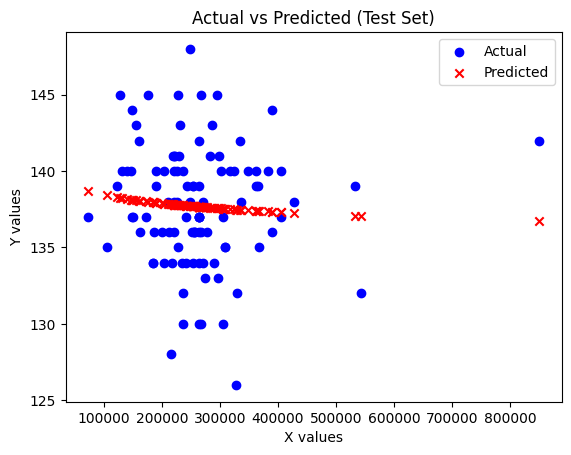

SSE :  1588.553163140672


For deceased patients 

Weights: (array([3.41612821]), 92.95286247204994)
Predicted Values :  [135.5243327  135.50345409 135.41377904 135.44295808 135.45308966
 135.49428071 135.43917937 135.48121994 135.43058336 135.45479634
 135.48029937 135.45423    135.49954708 135.44662724 135.25714626
 135.45019303 135.45703671 135.4656215  135.41686644 135.4326195
 135.44045152 135.43528438 135.47890585 135.38296898 135.50033819
 135.55567127 135.39530461 135.47528519 135.45193895 135.47607191
 135.31630091 135.44842269 135.41686644 135.38196837 135.46086438
 135.40487858 135.4926152  135.4656215  135.45077768 135.47528519
 135.46510167 135.51164724 135.52498348 135.58386521 135.5148519
 135.52465851 135.47528519 135.49592459]


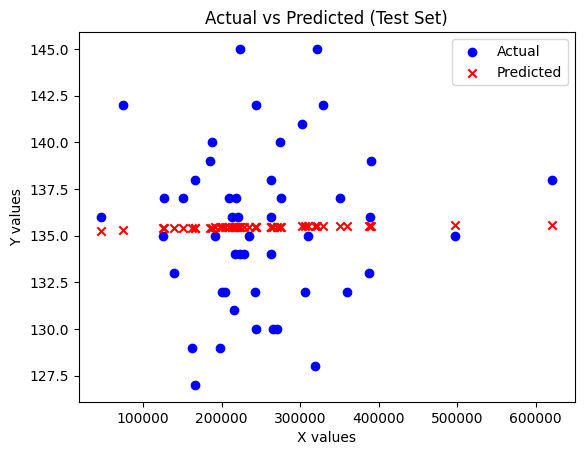

SSE :  843.7722971402118




In [23]:
#For Model 4
print("Analysis for Model 4\n")
print("For surviving patients \n")
evaluate_model(x0, y0, model4)
print("For deceased patients \n")
evaluate_model(x1, y1, model4)


Analysis for Model 5

For surviving patients 

Weights: (array([-0.00156791]), 4.936953949189416)
Predicted Values :  [137.8221123  137.60633817 137.57353135 137.65277998 137.60633817
 137.40226488 137.94056057 137.83032614 137.90365812 137.00831103
 137.67983965 137.73310448 137.6937103  137.47670466 137.45287343
 137.60633817 137.48480435 138.17962405 137.48480435 137.54677172
 137.40966041 137.47402239 137.60633817 137.02364074 137.7007342
 138.07334356 138.2451631  137.33627105 137.24829836 138.07890274
 137.29864475 137.42213609 137.7554134  137.59496303 137.28151742
 137.64285749 137.28363891 137.51239422 137.60633817 137.72580039
 138.04609532 137.60633817 138.07890274 137.89468473 137.63305314
 137.6937103  138.01971737 137.8221123  137.50401967 137.50680172
 137.88140503 137.4246541  137.59186698 137.60633817 137.78613015
 137.75165305 137.59496303 137.24829836 137.63957639 137.43480398
 137.69721477 137.52654405 137.73310448 137.63305314 137.71496423
 137.88140503 137.8991592

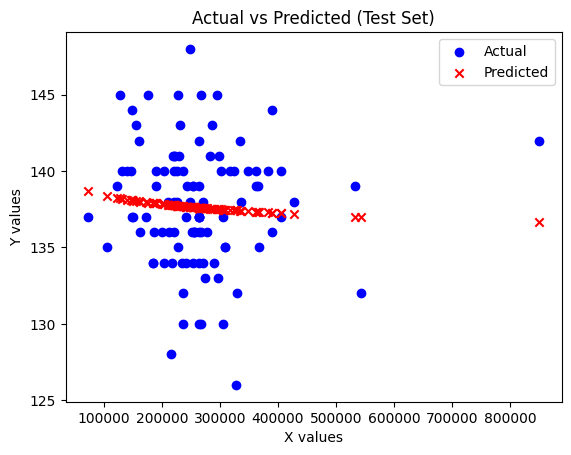

SSE :  1588.8313748795504


For deceased patients 

Weights: (array([0.02564702]), 4.588669344033369)
Predicted Values :  [135.45952625 135.43867952 135.34917781 135.37829395 135.38840515
 135.42952115 135.37452303 135.41648283 135.36594514 135.39010848
 135.41556389 135.38954325 135.43477882 135.38195564 135.19298965
 135.38551427 135.39234447 135.40091284 135.35225826 135.36797694
 135.37579254 135.37063619 135.41417284 135.31844096 135.43556865
 135.49082302 135.33074643 135.41055869 135.38725672 135.41134399
 135.25195519 135.38374748 135.35225826 135.31744284 135.39616476
 135.34029777 135.42785843 135.40091284 135.38609776 135.41055869
 135.40039399 135.44685978 135.4601761  135.51898552 135.45005953
 135.45985159 135.41055869 135.4311623 ]


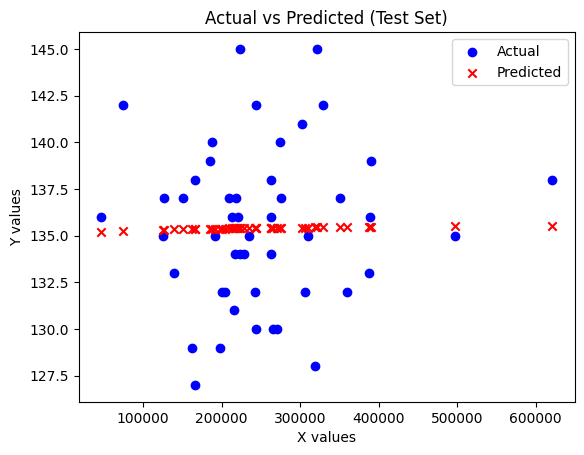

SSE :  843.971689851909




In [24]:
#For Model 5
print("Analysis for Model 5\n")
print("For surviving patients \n")
evaluate_model(x0, y0, model5)
print("For deceased patients \n")
evaluate_model(x1, y1, model5)